In [3]:
import plotly.express as px
import pandas as pd
import plotly.io as pio
# import plotly.graph_objects as go

# pio.renderers.default = "notebook"

In [18]:
df = pd.read_csv('all_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     1059 non-null   object 
 1   company_name             1106 non-null   object 
 2   rating                   1106 non-null   float64
 3   industry                 819 non-null    object 
 4   size                     1004 non-null   object 
 5   headquarters             1049 non-null   object 
 6   reviews                  1106 non-null   float64
 7   salaries                 1106 non-null   float64
 8   jobs                     1106 non-null   float64
 9   url                      1059 non-null   object 
 10  id                       1106 non-null   int64  
 11  company                  1106 non-null   object 
 12  contract                 647 non-null    object 
 13  created_at               1106 non-null   object 
 14  industry_1              

In [20]:
df['size']

0             10K+ Employees
1             10K+ Employees
2       201 to 500 Employees
3       201 to 500 Employees
4         1K to 5K Employees
                ...         
1101    201 to 500 Employees
1102    201 to 500 Employees
1103                     NaN
1104                     NaN
1105                     NaN
Name: size, Length: 1106, dtype: object

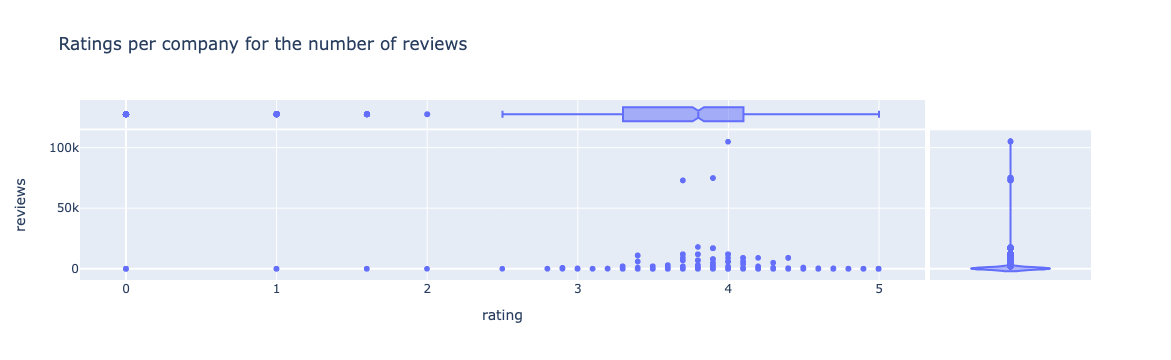

In [19]:
fig = px.scatter(df, x='rating', y='reviews', marginal_y="violin",
           marginal_x="box", title='Ratings per company for the number of reviews')
fig.show()

# x = rating  y = rating_count  size = size
fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)

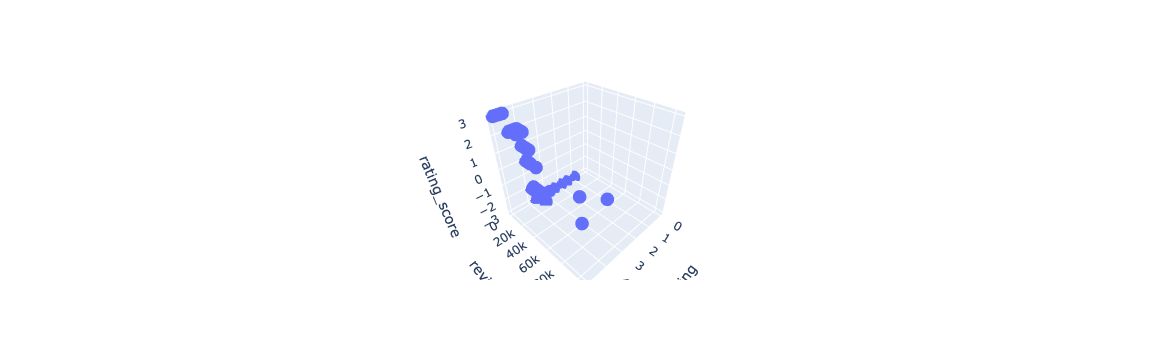

In [17]:
fig = px.scatter_3d(df, x='rating', y='reviews', z='rating_score')
fig.show()